In [1]:
!pip install -r ../requirements.txt --quiet
!pip install ../ --quiet


# vfb object => wrapper for connection to public VFB servers + query methods
from vfb_connect import vfb

vfb._load_limit = 20 # limit number of results to 20 for brevity

Welcome to the Virtual Fly Brain API
See the documentation at: https://virtualflybrain.org/docs/tutorials/apis/

Establishing connections to https://VirtualFlyBrain.org services...
Session Established!

Type vfb. and press tab to see available queries. You can run help against any query e.g. help(vfb.terms)


In [2]:
#  Query with for term by ID. Supported IDs include anatomical individuals 
# (typically used for individual anatomical entities depicted in images), 
# dataset IDs and anatomy ontology IDs (FBbt)

# All summary return values are in a pandas DataFrame format by default

vfb.term('VFB_00010001').summary # This can take single ID as a string. To call multiple IDs, use a list of strings with vfb.terms()

,ID,Name,Description,URL,Related Terms,Parents,Publications,License,Cross References,Datasets
0,VFB_00010001,fru-F-500075,OutAge: Adult 5~15 days,https://n2t.net/vfb:VFB_00010001,"[Rel(relation=MinimalEdgeInfo(label=expresses,...","[expression pattern fragment, adult SMPpv1 lin...","[, ]",FlyCircuit License,[http://flycircuit.tw/modules.php?name=clearpa...,[FlyCircuit 1.0 - single neurons (Chiang2010)]


In [3]:
vfb.terms(['VFB_00010001','VFB_00000001']).get_summaries() # this will produce a summary of the VFBterms in a DataFrame

Pulling 2 terms from VFB...


,ID,Name,Description,URL,Related Terms,Parents,Publications,License,Cross References,Datasets
0,VFB_00010001,fru-F-500075,OutAge: Adult 5~15 days,https://n2t.net/vfb:VFB_00010001,"[Rel(relation=MinimalEdgeInfo(label=expresses,...","[expression pattern fragment, adult SMPpv1 lin...","[, ]",FlyCircuit License,[http://flycircuit.tw/modules.php?name=clearpa...,[FlyCircuit 1.0 - single neurons (Chiang2010)]
1,VFB_00000001,fru-M-200266,OutAge: Adult 5~15 days,https://n2t.net/vfb:VFB_00000001,"[Rel(relation=MinimalEdgeInfo(label=expresses,...","[adult CM3 lineage neuron, expression pattern ...","[, ]",FlyCircuit License,[http://flycircuit.tw/modules.php?name=clearpa...,[FlyCircuit 1.0 - single neurons (Chiang2010)]


In [4]:
print(dir(vfb.terms(['VFB_00010001'])[0])) # This will return the properties available for this term you can use to query if. This is specific to the term type

# dir is a standard python function that returns the properties and methods of an object.
# print is simply so it returns the output on a single line here.

Pulling 1 terms from VFB...
['channel_images', 'children', 'data_source', 'datasets', 'debug', 'description', 'downstream_neuron_types', 'downstream_neurons', 'downstream_partners', 'expresses', 'has_image', 'has_neuron_connectivity', 'has_region_connectivity', 'has_scRNAseq', 'has_tag', 'id', 'innervating', 'instances', 'is_dataset', 'is_instance', 'is_neuron', 'is_template', 'is_type', 'license', 'lineage_clone_types', 'lineage_clones', 'load_mesh', 'load_skeleton', 'load_skeleton_synaptic_connections', 'load_volume', 'name', 'neuron_types_that_overlap', 'neuron_types_with_synaptic_terminals_here', 'neurons_that_overlap', 'neurons_with_synaptic_terminals_here', 'open', 'overlaps', 'parents', 'part_of', 'plot2d', 'plot3d', 'plot_partners', 'plot_similar', 'potential_drivers_nblast', 'potential_drivers_neuronbridge', 'publications', 'related_terms', 'show', 'similar_neurons_nblast', 'skeleton', 'subparts', 'subtypes', 'summary', 'synonyms', 'term', 'thumbnail', 'transgene_expression', 

In [5]:
print(dir(vfb.terms(['VFB_00010001']))) # Note this isn't just a List of VFBterm objects its a VFBTerms object that has usefull methods for querying the terms

Pulling 1 terms from VFB...
['AND', 'NAND', 'NOR', 'NOT', 'OR', 'XNOR', 'XOR', 'append', 'get', 'get_all', 'get_colours_for', 'get_ids', 'get_names', 'get_summaries', 'load_meshes', 'load_skeletons', 'load_volumes', 'open', 'plot2d', 'plot3d', 'plot3d_by_type', 'show', 'summary', 'terms', 'tqdm_with_threshold', 'vfb']


In [6]:
vfb.term(['VFB_00010001']).xrefs # This will return the xrefs for the term

[Xref(link_text=fru-F-500075 on FlyCircuit 1.0, link=http://flycircuit.tw/modules.php?name=clearpage&op=detail_table&neuron=fru-F-500075, accession=fru-F-500075)]

In [7]:
#  TermInfo query can cope with different types of IDs. returning cached data if available:

vfb.terms(['Ito2013']).get_summaries()

Pulling 1 terms from VFB...


,ID,Name,Description,URL,Counts,Publications,License
0,Ito2013,Ito lab adult brain lineage clone image set,An exhaustive set of lineage clones covering t...,http://flybase.org/reports/FBrf0221438.html,"{'images': 96, 'types': 91}","[Ito et al., 2013, Curr. Biol. 23(8): 644--655]",CC-BY-NC-SA_4.0


In [8]:
# vfb. has many useful methods for querying the VFB database. You can see the available methods by using the dir function

print(dir(vfb)) # This will return the methods available for the vfb object

# You can also use the help function to get more information on the methods
# print is simply so it returns the output on a single line here.

['cache_file', 'cypher_query', 'generate_lab_colors', 'get_TermInfo', 'get_cache_file_path', 'get_connected_neurons_by_type', 'get_datasets', 'get_dbs', 'get_gene_function_filters', 'get_images', 'get_images_by_filename', 'get_images_by_type', 'get_instances', 'get_instances_by_dataset', 'get_neurons_downstream_of', 'get_neurons_upstream_of', 'get_nt_predictions', 'get_nt_receptors_in_downstream_neurons', 'get_potential_drivers', 'get_scRNAseq_expression', 'get_scRNAseq_gene_expression', 'get_similar_neurons', 'get_subclasses', 'get_superclasses', 'get_templates', 'get_terms_by_region', 'get_terms_by_xref', 'get_transcriptomic_profile', 'get_vfb_link', 'json', 'lookup', 'lookup_id', 'lookup_name', 'nc', 'neo_query_wrapper', 'oc', 'owl_instances', 'owl_subclasses', 'owl_superclasses', 'queries', 'reload_lookup_cache', 'search', 'setNeoEndpoint', 'setOwleryEndpoint', 'solr_url', 'term', 'terms', 'vfb_base', 'vfb_id_2_xrefs', 'xref_2_vfb_id']


In [9]:
# Query with an external ID.
# To find what sources (DBs) are supported: 

print(vfb.get_dbs())

# print is simply so it returns the output on a single line here.

['vnc1_catmaid_api', 'vnc_harvard_catmaid_api', 'flywire_supervoxel', 'l1em_catmaid_api', 'fafb_catmaid_api', 'jrc_slide_code_api', 'InsectBrainDB', 'FlyBrain_NDB', 'catmaid_fafb', 'catmaid_fanc', 'scExpressionAtlas', 'Konstantinides_et_al_2018_OpticLobe', 'FlyCircuit', 'QuickGO', 'catmaid_l1em', 'FlyLightSplit', 'FlyLightRaw', 'AmiGO', 'flywire783', 'flywire630', 'VDRC', 'FlyBase', 'catmaid_leg40', 'larvalbrain_neuropil', 'BrainTrap', 'catmaid_fanc_JRC2018VF', 'neuprint_JRC_Manc', 'FlyBase_vocabularies', 'FlyLightSplitSlideCode', 'FlyLightGen1MCFO', 'FlyCircuit1v2', 'FlyLightRawSlideCode', 'neuronbridge', 'FlyPNS', 'ExpressionAtlas', 'larvalbrain_axon_tract', 'FlyLightGen1MCFOSlideCode', 'FlyLight', 'DoOR', 'neuprint_JRC_Hemibrain_1point0point1', 'GEO', 'lmb_cluster_pages_v3', 'lmb_cluster_pages_v2', 'neuprint_JRC_Hemibrain_1point1']


In [10]:
# Querying with an ID from catmaid_l1em
vfb.term('catmaid_l1em:17545695').summary

,ID,Name,Description,URL,Parents,Publications,License,Cross References,Datasets
0,VFB_00100184,mPN (L1EM:17545695),,https://n2t.net/vfb:VFB_00100184,[SEZ cypress],"[, ]",CC-BY-SA_4.0,[https://l1em.catmaid.virtualflybrain.org/?pid...,[Larval olfactory system neurons - EM (Berk2016)]


In [11]:
# Get all xrefs by database

list(vfb.xref_2_vfb_id(db='catmaid_fafb', return_just_ids=False).items())[0:10]

[('11488881',
  [{'db': 'catmaid_fafb', 'vfb_id': 'VFB_00102fvq'},
   {'db': 'catmaid_fafb', 'vfb_id': 'VFB_00102gso'}]),
 ('4524559', [{'db': 'catmaid_fafb', 'vfb_id': 'VFB_001013x3'}]),
 ('14810632',
  [{'db': 'catmaid_fafb', 'vfb_id': 'VFB_00102h06'},
   {'db': 'catmaid_fafb', 'vfb_id': 'VFB_00102g38'}]),
 ('5864214', [{'db': 'catmaid_fafb', 'vfb_id': 'VFB_00102dw0'}]),
 ('10604481',
  [{'db': 'catmaid_fafb', 'vfb_id': 'VFB_00102ftc'},
   {'db': 'catmaid_fafb', 'vfb_id': 'VFB_00102gqa'}]),
 ('5055252', [{'db': 'catmaid_fafb', 'vfb_id': 'VFB_001000mb'}]),
 ('14923390',
  [{'db': 'catmaid_fafb', 'vfb_id': 'VFB_00102h53'},
   {'db': 'catmaid_fafb', 'vfb_id': 'VFB_00102g85'}]),
 ('14932351',
  [{'db': 'catmaid_fafb', 'vfb_id': 'VFB_00102g8m'},
   {'db': 'catmaid_fafb', 'vfb_id': 'VFB_00102h5k'}]),
 ('10718661',
  [{'db': 'catmaid_fafb', 'vfb_id': 'VFB_00102gql'},
   {'db': 'catmaid_fafb', 'vfb_id': 'VFB_00102ftn'}]),
 ('12917646',
  [{'db': 'catmaid_fafb', 'vfb_id': 'VFB_00102gut'},
   

In [12]:
# Methods allow integrative queries and support query by label, symbol, synonym or ID

# list of all related terms can be called including parts of X and subtypes of X, neurons that...etc.

fsb = vfb.term('fan-shaped body')

print(fsb.subparts)

print(f"{len(fsb.neuron_types_with_synaptic_terminals_here)} neuron_types_with_synaptic_terminals_here")

print(f"{len(fsb.neuron_types_that_overlap)} neuron_types_that_overlap")


Pulling 16 terms from VFB...


Loading Terms: 100%|██████████| 16/16 [00:04<00:00,  3.29it/s]


VFBTerms(['fan-shaped body layer 9', 'adult dorsal fan-shaped body', 'adult ventral fan-shaped body', 'central tooth of fan-shaped body', 'tooth of fan-shaped body', 'cryptic tooth of fan-shaped body', 'fan-shaped body layer 2', 'fan-shaped body layer 1', 'fan-shaped body layer 6', 'fan-shaped body layer 5', 'fan-shaped body layer 4', 'fan-shaped body layer 3', 'fan-shaped body layer 8', 'fan-shaped body layer 7', 'fan-shaped body slice', 'fan-shaped body layer'])
More thann the load limit of 20 requested. Loading first 20 terms out of 220
Pulling 20 terms from VFB...


Loading Terms: 100%|██████████| 20/20 [00:02<00:00,  8.17it/s]


20 neuron_types_with_synaptic_terminals_here
More thann the load limit of 20 requested. Loading first 20 terms out of 220
Pulling 20 terms from VFB...


Loading Terms: 100%|██████████| 20/20 [00:02<00:00,  8.28it/s]

20 neuron_types_that_overlap


In [13]:
fsb._subparts.get_names() # This will return the names of the subparts of the fan-shaped body


['fan-shaped body layer 9',
 'adult dorsal fan-shaped body',
 'adult ventral fan-shaped body',
 'central tooth of fan-shaped body',
 'tooth of fan-shaped body',
 'cryptic tooth of fan-shaped body',
 'fan-shaped body layer 2',
 'fan-shaped body layer 1',
 'fan-shaped body layer 6',
 'fan-shaped body layer 5',
 'fan-shaped body layer 4',
 'fan-shaped body layer 3',
 'fan-shaped body layer 8',
 'fan-shaped body layer 7',
 'fan-shaped body slice',
 'fan-shaped body layer']

In [14]:
cyp_neuron_images = vfb.term('larval subesophageal zone cypress neuron').instances
cyp_neuron_images.get_summaries()

Loading instances for the first time...
Pulling 2 terms from VFB...


,ID,Name,Description,URL,Parents,Publications,License,Cross References,Datasets
0,VFB_00100173,mPN (L1EM:14154154),,https://n2t.net/vfb:VFB_00100173,[SEZ cypress],"[, ]",CC-BY-SA_4.0,[https://l1em.catmaid.virtualflybrain.org/?pid...,[Larval olfactory system neurons - EM (Berk2016)]
1,VFB_00100184,mPN (L1EM:17545695),,https://n2t.net/vfb:VFB_00100184,[SEZ cypress],"[, ]",CC-BY-SA_4.0,[https://l1em.catmaid.virtualflybrain.org/?pid...,[Larval olfactory system neurons - EM (Berk2016)]


In [15]:
[attr for attr in dir(cyp_neuron_images) if attr.startswith('load')] # This will return the load methods available for the cyp_neuron_images object


['load_meshes', 'load_skeletons', 'load_volumes']

In [16]:
# you can simply call use .plot3d() to plot the images in 3D (this automatically loads the appropriate data)
cyp_neuron_images.plot3d(include_template=True) # To ensure you know the anatomical location of the neuron, you can include the template in the plot with include_template=True

Enforcing the display template space as L1 larval CNS ssTEM - Cardona/Janelia from the first skeleton found. Specify a template to avoid this.
Plotting 3D representation of 2 items
Adding template VFB_00050000 to the plot


Loading thumbnail for mPN (L1EM:14154154)


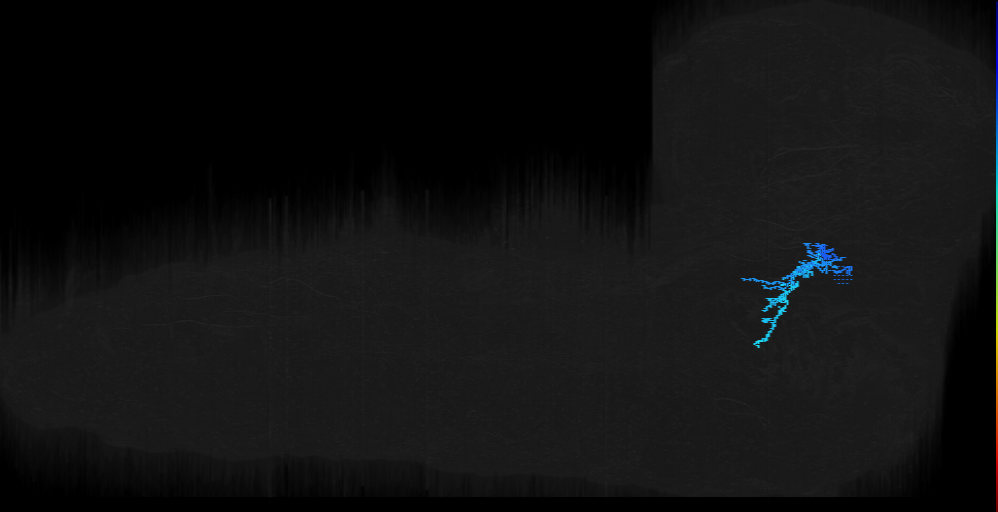

In [17]:
# We can also simply call .show() to show the image thumbnail in here or use .open() to open the the term or terms in VFB 3D webbrowser
cyp_neuron_images[0].show()

In [18]:
fsb.instances.get_summaries()


Loading instances for the first time...
Pulling 5 terms from VFB...


,ID,Name,Description,URL,Parents,Publications,License,Datasets,Related Terms
0,VFB_00101398,FB on JRC_FlyEM_Hemibrain,,https://n2t.net/vfb:VFB_00101398,[fb],[],CC-BY_4.0,[JRC_FlyEM_Hemibrain painted domains],NaN
1,VFB_00102134,FB on JRC2018Unisex adult brain,,https://n2t.net/vfb:VFB_00102134,[fb],[],CC-BY-NC-SA_4.0,[JRC 2018 templates & ROIs],NaN
2,VFB_00030633,fan-shaped body on adult brain template JFRC2,,https://n2t.net/vfb:VFB_00030633,[fb],"[, ]",CC-BY-SA_4.0,[BrainName neuropils on adult brain JFRC2 (Jen...,NaN
3,VFB_00030811,fan-shaped body on adult brain template Ito2014,,https://n2t.net/vfb:VFB_00030811,[fb],[],CC-BY-SA_4.0,[BrainName neuropils and tracts - Ito half-brain],NaN
4,VFB_001012c7,FB-column3 on JRC_FlyEM_Hemibrain,,https://n2t.net/vfb:VFB_001012c7,[fb],[],CC-BY_4.0,[JRC_FlyEM_Hemibrain painted domains],[Rel(relation=MinimalEdgeInfo(label=is part of...


In [19]:
# Image queries range across multiple types
dPAM = vfb.term('dopaminergic PAM neuron')
parents = set([instance.parents[0].name for instance in dPAM.instances])
# set is used to remove duplicates
# sorted is used to sort the list
print(sorted(parents))


Loading instances for the first time...
More thann the load limit of 20 requested. Loading first 20 terms out of 384
Pulling 20 terms from VFB...


Loading Terms: 100%|██████████| 20/20 [00:02<00:00,  8.49it/s]


Pulling 1 terms from VFB...
Pulling 1 terms from VFB...
Pulling 1 terms from VFB...
Pulling 1 terms from VFB...
Pulling 1 terms from VFB...
Pulling 1 terms from VFB...
Pulling 1 terms from VFB...
Pulling 1 terms from VFB...
Pulling 1 terms from VFB...
Pulling 1 terms from VFB...
Pulling 1 terms from VFB...
Pulling 1 terms from VFB...
Pulling 1 terms from VFB...
Pulling 1 terms from VFB...
Pulling 1 terms from VFB...
Pulling 1 terms from VFB...
Pulling 1 terms from VFB...
Pulling 1 terms from VFB...
Pulling 1 terms from VFB...
Pulling 1 terms from VFB...
['PAM01', 'PAM01 neuron of upper MB commissure', 'PAM01 neuron of ventral MB commissure', 'PAM02', 'PAM15']


In [20]:
# Finding single cell transcriptomics data for a given cell type
profile = vfb.get_transcriptomic_profile(cell_type = 'adult olfactory receptor neuron')
print(profile.head())

                                  cell_type   cell_type_id       sample_sex  \
0  adult antennal olfactory receptor neuron  FBbt_00007352  female organism   
1  adult antennal olfactory receptor neuron  FBbt_00007352    male organism   
2  adult antennal olfactory receptor neuron  FBbt_00007352             None   
3  adult antennal olfactory receptor neuron  FBbt_00007352  female organism   
4  adult antennal olfactory receptor neuron  FBbt_00007352    male organism   

                                       sample_tissue  \
0  [antenna, adult corpus cardiacum, antenna, adu...   
1  [wing, haltere, adult, adult pars intercerebra...   
2  [antenna, proboscis, male reproductive system,...   
3  [antenna, adult corpus cardiacum, antenna, adu...   
4  [wing, haltere, adult, adult pars intercerebra...   

                                            ref     gene      gene_id  \
0  Li et al., 2022, Science 375(6584): eabk2432  14-3-3ε  FBgn0020238   
1  Li et al., 2022, Science 375(6584): eab

In [21]:
# These results can be filtered by gene function - first find available gene functions
functions = vfb.get_gene_function_filters()
print(functions)

['Acetylcholine_receptor', 'Calcium_binding', 'Carbohydrate_binding', 'Chaperone', 'Cytoskeleton_binding', 'DNA_binding', 'Dopamine_receptor', 'Enzyme', 'GABA_receptor', 'GPCR', 'Glutamate_receptor', 'Gustatory_receptor', 'Histamine_receptor', 'Hormone', 'Ion_channel', 'Ligand', 'Lipid_binding', 'Mechanosensory_ion_channel', 'Metal_ion_binding', 'Neuropeptide', 'Neurotransmitter_receptor', 'Octopamine_receptor', 'Odorant_binding', 'Olfactory_receptor', 'Peptide_or_protein_hormone_receptor', 'Photoreceptor', 'RNA_binding', 'Receptor', 'Regulator', 'Serotonin_receptor', 'Small_molecule_binding', 'Structural_molecule', 'Thermosensory_ion_channel', 'Transcription_factor', 'Transporter', 'Tyramine_receptor']


In [22]:
# Then run transcriptomics query speicfying a gene function to filter on
filtered_profile = vfb.get_transcriptomic_profile(cell_type = 'adult olfactory receptor neuron', gene_type='Olfactory_receptor')
print(filtered_profile.head())

                                  cell_type   cell_type_id       sample_sex  \
0  adult antennal olfactory receptor neuron  FBbt_00007352  female organism   
1  adult antennal olfactory receptor neuron  FBbt_00007352    male organism   
2  adult antennal olfactory receptor neuron  FBbt_00007352             None   
3           adult olfactory receptor neuron  FBbt_00007386  female organism   
4           adult olfactory receptor neuron  FBbt_00007386    male organism   

                                       sample_tissue  \
0  [antenna, adult corpus cardiacum, antenna, adu...   
1  [wing, haltere, adult, adult pars intercerebra...   
2  [antenna, proboscis, male reproductive system,...   
3                                       [adult head]   
4                                       [adult head]   

                                            ref     gene      gene_id  \
0  Li et al., 2022, Science 375(6584): eabk2432     Orco  FBgn0037324   
1  Li et al., 2022, Science 375(6584): eab